<a href="https://colab.research.google.com/github/tirals88/Numerical-Mathematics-and-Computing/blob/main/Chap6_Spline%20Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# 6.1 1차 및 2차 스플라인

## 1차 스플라인

스플라인 함수는 어떤 매끄러운 조건을 가진 다항식의 조각들로 이루어진 함수이다. 예로 다변형 polygonal함수 또는 1차 스플라인으로 불리는 이 함수는 각 조각들이 연속성을 가지고 서로 연결되는 선형 다항식이다.

스플라인 이론에서는 함수의 성질이 바뀌는 점인 $t_{0}, t_{1}, t_{2}, \cdots , t_{n}$을 절점 knot이라 지칭한다.

$\boxtimes$ **정리 1** 1차 스플라인

다음을 만족하는 함수 $S$를 1차 스플라인이라 부른다.

1. $S$의 정의역은 구간 $[a, b]$이다.
2. $S$는 $[a, b]$에서 연속이다.
3. 각 부분구간 $[t_{i}, t_{i+1}]$에서 $S$가 선형 다항식임을 만족하는 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재한다.

일반적으로 구간 $[a, b]$외부에서 $S(x)$는 $a$의 왼쪽 영역에서는 가장 왼쪽의 부분구간 $[t_{0}, t_{1}]$의 함수로 정의하고, $b$의 오른쪽 영역에서는 가장 오른쪽의 부분구간 $[t_{n-1}, t_{n}]$의 함수로 정의한다.

스플라인 부분 : 선형 $S_{i}(x)$

구간 $[t_{i}, t_{i+1}]$에서 다음을 얻는다.
$$S_{i}(x) = y_{i} + m_{i}(x-t_{i}) = y_{i} + \frac{y_{i+1} - y_{i}}{t_{i+1} - t_{i}}(x - t_{i})$$

함수 $S$는 계수 $n$개와 상수 $n$개 총 $2n$개의 변수와, $2n$개의 조건으로 변수의 수와 조건의 수가 같다. 조건이라 함은 각 구성 함수 $S_{i}$가 부분구간의 양 끝점에서의 데이터를 보간한다는 것이다.

또한 $t_{0} \leq x \leq t_{n}$이면, $x$를 포함하는 구간 $[t_{i}, t_{i+1}]$는 $x - t_{i}$가 $x-t_{n-1}, x-t_{n-2}, \cdots, x-t_{0}$ 중 처음으로 음이 아닌 값이라는 사실로 특정지어진다.

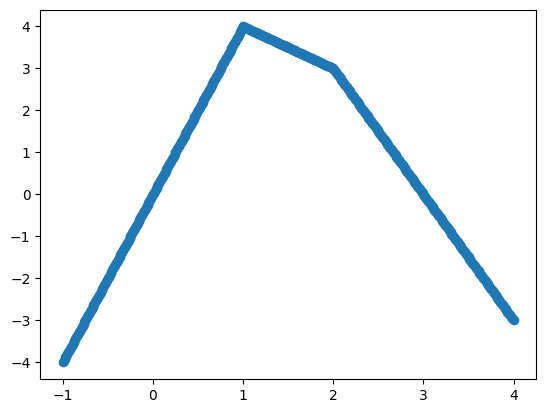

In [ ]:
#스플라인 1차 함수
def Spline1(n, t_, y_, x):
  k = 0
  for i in range(n):
    if not (x - t_[n-1 - i]) < 0:
      k = n-1 - i
      break

  spline_result = y_[k] + (x-t_[k])*(y_[k+1] - y_[k])/(t_[k+1] - t_[k])
  return spline_result

t_00 = [0, 1, 2, 3]
y_00 = [0, 4, 3, 0]
#Spline1(3, t_00, y_00, 2.5)

x_00 = np.arange(-1, 4.01, 0.01)
y_01 = np.array([Spline1(3, t_00, y_00, x__) for x__ in x_00])
plt.scatter(x_00, y_01)
plt.show()

## 연속계수

1차 스플라인을 통해 함수를 보간할 때 그 적합성을 평가하기 위해 함수 $f$의 연속계수 modulus of continuity라는 것을 정의할 필요가 있다.

$f$의 연속계수는 다음과 같다.

$$w(f;\;h) = sup\{|f(u) - f(v)| : a \leq u \leq v \leq b, |u-v| \leq h\}$$

만약 $f$가 구간 내에서 연속이면 $f$는 균등 연속 uniformly continuous이고, $h$가 $0$에 가까이 감에 따라 $w(f;\;h)$도 $0$에 가까이 간다. 반대의 경우는 그렇지 않다.

만약 $f$가 구간 $(a, b)$에서 미분가능하고 $f'(x)$가 $(a, b)$에서 유계이면 연속계수의 추정값을 얻는 데 평균값 정리를 사용할 수 있다.

$$|f(u) - f(v)| = |f'(c)(u-v)| \leq M_{1} |u-v| \leq M_{1}h$$

그리고 또한 $f$를 보간하는 1차 다항식 $p$가 있고, $h = b-a$일 때, 다음을 얻을수 있다.

$$|f(x) - p(x)| \leq w(f; \;h)$$

**증명**

선형 함수 $p$는 다음과 같은 식으로 주어진다.

$$p(x) = (\frac{x-a}{b-a})f(b) + (\frac{b-x}{b-a})f(a) $$
$$f(x) - p(x) = (\frac{x-a}{b-a})[f(x) - f(b)] + (\frac{b-x}{b-a})[f(x) - f(a)]$$

->

\begin{eqnarray}
    |f(x) - p(x)| & \leq &(\frac{x-a}{b-a})|f(x) - f(b)| + (\frac{b-x}{b-a})|f(x) - f(a)| \\
		& \leq &(\frac{x-a}{b-a})w(f;\;h) + (\frac{b-x}{b-a})w(f;\;h) \\
		& = & [(\frac{x-a}{b-a}) + (\frac{b-x}{b-a})]w(f;\;h) = w(f;\;h)
\end{eqnarray}

##2차 스플라인

$\boxtimes$ **정리 1** 2차 스플라인

다음을 만족하는 함수 $Q$를 2차 스플라인이라 부른다.

1. $Q$의 정의역은 구간 $[a, b]$이다.
2. $Q$ 와 $Q'$ $[a, b]$에서 연속이다.
3. 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재하고, $Q$는 각 부분구간 $[t_{i}, t_{i+1}]$에서 최대 2차의 다항식이다.

이 때, $Q'(x)$는 연속이므로 $z_{i} \equiv Q'(t_{i})$로 두면, $Q_{i}$의 식은 다음과 같다.

$$Q_{i}(x) = \frac{z_{i+1} - z_{i}}{2(t_{i+1} - t_{i})}(x-t_{i})^{2} + z_{i}(x - t_{i}) + y_{i}$$

그리고 위 식이 연속임을 이용해 수정하면 다음 식을 얻을 수 있다.

$$z_{i+1} = -z_{i} + 2(\frac{y_{i+1} - y_{i}}{t_{i+1}-t_{i}})$$

이 식은 임의의 값 $z_{0}$으로부터 시작해서 재귀적으로 벡터 $[z_{0}, z_{1}, \cdots , z_{n}]^{T}$를 얻는 데 사용될 수 있다.

In [ ]:
#ex3
def Spline2(n, t_, y_, x, z_0):
  recurs_z = [z_0]
  for i in range(n):
    recurs_z.append(2*(y_[i+1] - y_[i])/(t_[i+1] - t_[i])-recurs_z[-1] )

  k = 0
  for i in range(n):
    if not (x - t_[n-1 - i]) < 0:
      k = n-1 - i
      break

  spline_result = y_[k] + (x-t_[k])*(recurs_z[k]) + (x-t_[k])**2 * (recurs_z[k+1] - recurs_z[k])/(2*(t_[k+1] - t_[k]))
  return spline_result

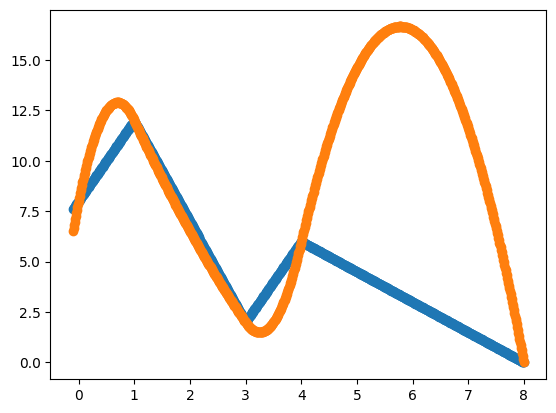

In [ ]:
t_03 = [0, 1, 3, 4, 8]
y_03 = [8, 12, 2, 6, 0]

x_03 = np.arange(-0.1, 8.01, 0.01)
q_031 = np.array([Spline1(4, t_03, y_03, x__) for x__ in x_03])
q_032 = np.array([Spline2(4, t_03, y_03, x__, 14) for x__ in x_03])

plt.scatter(x_03, q_031)
plt.scatter(x_03, q_032)
plt.show()

In [ ]:
# @title
#1
def Spline1_up(n, t_, y_, x):
  k = 0
  for i in range(n):
    if not (x - t_[i]) > 0:
      k = i+1
      break

  spline_result = y_[k] + (x-t_[k])*(y_[k+1] - y_[k])/(t_[k+1] - t_[k])
  return spline_result

In [ ]:
# @title
#3
#구간별 2차 선형 다항식
def Bi_Linear(n, m, x_, y_, z_, input):
  i = 0
  for k in range(n):
    if not (input[0] - x_[k]) > 0:
      i = k - 1
      break

  j = 0
  for k in range(m):
    if not (input[1] - y_[k]) > 0:
      j = k - 1
      break

  p_1 = ((x_[i] - input[0])*(y_[j]-input[1])*z_[i+1,j+1] + (x_[i+1] - input[0])*(y_[j+1]-input[1])*z_[i,j]) / ((x_[i+1]-x_[i])*(y_[j+1] - y_[j]))
  p_2 = ((x_[i+1] - input[0])*(y_[j]-input[1])*z_[i,j+1] + (x_[i] - input[0])*(y_[j+1]-input[1])*z_[i+1,j]) / ((x_[i+1]-x_[i])*(y_[j+1] - y_[j]))
  p = p_1 - p_2

  return p

In [ ]:
#5*10 개의 불균일 간격의 데이터
x_13 = [-1, 0, 0.5, 2, 3]
y_13 = [-1, -0.2, 0, 0.4, 0.8, 1.2, 1.5, 1, 1.8, 3]

X_13, Y_13 = np.meshgrid(x_13, y_13)
z_13 = np.exp(X_13 + Y_13)
z_13 = np.transpose(z_13)

In [ ]:
Bi_Linear(4, 9, x_13, y_13, z_13, (x_03[0], y_03[0]))

-0.1171565700066412

In [ ]:
x_03 = np.linspace(-1.5, 2.5, 9)
y_03 = np.linspace(-1.5, 2.5, 9)
X_03, Y_03 = np.meshgrid(x_03, y_03)

p_13 = np.array([ [Bi_Linear(3, 2, x_13, y_13, z_13, (x__, y__)) for y__ in y_03] for x__ in x_03 ])

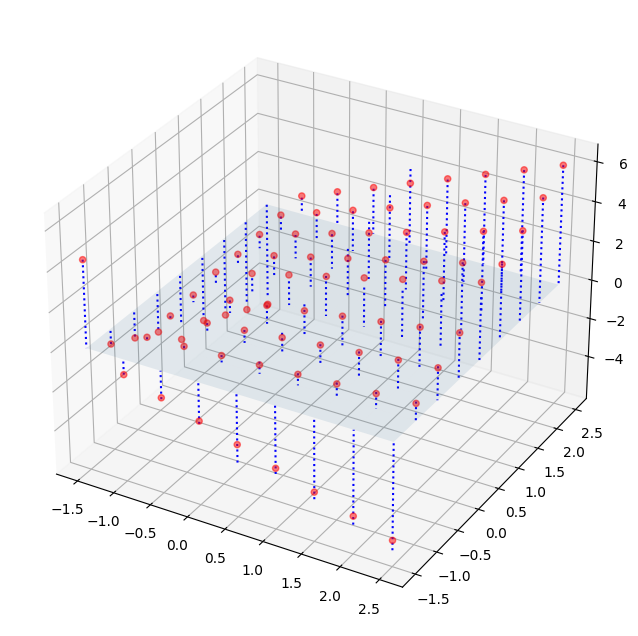

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.scatter(X_03, Y_03, p_13, color = 'r', alpha = 0.5)

for i in range(len(X_03.reshape(-1,))):
    ax.plot([X_03.reshape(-1,)[i], X_03.reshape(-1,)[i]], [Y_03.reshape(-1,)[i], Y_03.reshape(-1,)[i]], [np.transpose(p_13).reshape(-1,)[i], 0], color='blue', linestyle=':')
#ax.stem(X_03.reshape(-1,), Y_03.reshape(-1,), np.transpose(p_13).reshape(-1,))

ax.plot_surface(X_03, Y_03, np.zeros_like(X_03), alpha=0.1)

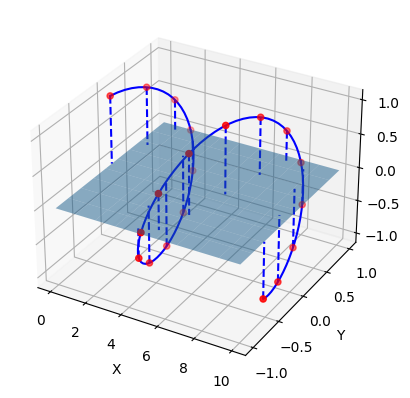

In [ ]:
#Chat GPT 참고 코드
#Line26, 27의 scatter point-XYplane 간 plot 코드 질문

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import splprep, splev

# Generate some random data points
x = np.linspace(0, 10, 20)
y = np.sin(x)
z = np.cos(x)

# Interpolate a spline through the data points
tck, u = splprep([x, y, z], s=0)
new_points = splev(np.linspace(0, 1, 100), tck)

# Plot the original data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter points
ax.scatter(x, y, z, c='r', marker='o')

# Plot lines between scatter points and x-y plane
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y[i]], [z[i], 0], color='blue', linestyle='--')

# Plot the spline curve
ax.plot(new_points[0], new_points[1], new_points[2], c='b')

# Plot the x-y plane
xx, yy = np.meshgrid(np.linspace(min(x), max(x), 10), np.linspace(min(y), max(y), 10))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Set labels and show plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
#5
#Spline2 함수가 z_0 초기값이 주어질 때, z_ 배열과 Q(x) 값을 계산

# 6.2 자연 3차 스플라인

$\boxtimes$ **정의** $k$차 스플라인

다음을 만족하는 함수 $S$를 $k$차 스플라인이라 부른다.

1. $S$의 정의역은 구간 $[a, b]$이다.
2. $S$ 와 $S', S'', \cdots , S^{(k-1)}$은 모두  $[a, b]$에서 연속이다.
3. 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재하고, $S$는 각 부분구간 $[t_{i}, t_{i+1}]$에서 최대 $k$차 다항식이다.

## 자연 3차 스플라인

앞선 2차 스플라인과 마찬가지로 진행되며, $S$는 $n$개의 3차 다항식 조각들로 이루어져 있다.

보간 조건들은 다음과 같다.

$$S(t_{i}) = y_{i}$$

연속 조건들은 오직 내부 절점들에만 부여된다. 각 부분구간내에서는 최대 3차 다항식으로 이루어져 있기 때문에 부분구간 내의 점에 대해서는 항상 연속이기 때문이다.

$$\lim_{x \to t_{i}^{-}}{S^{k}(t_{i})} = \lim_{x \to t_{i}^{+}}{S^{k}(t_{i})}$$

사용 가능한 차수의 모든 자유도를 사용하기 위해서 두 개의 조건이 더 필요하다.

$$ S''(t_{0}) = S''(t_{n}) = 0$$

위의 과정을 통해 얻은 스플라인 함수를 자연 3차 스플라인이라고 부른다.

- 스플라인 계수에 대한 연립방정식을 완전하게 하는 다른 방법들로 **주기적 3차 스플라인 periodic cubic spline**과 **고정적 3차 스플라인 clamped cubic spline**이 있다.

- 고정적 스플라인은 양 끝점에서 기울기가 고정된 스플라인 곡선이다.

- 주기적 스플라인은 양 끝점의 함숫값, 기울기, $k$차 미분 값이 서로 일치하는 곡선이다.

## 자연 3차 스플라인 알고리즘

앞선 가정으로 두 가지를 알고 있다.

$$ z_{i} \equiv S''(t_{i}) \:\:\:(0 \leq i \leq n) $$
$$ z_{0} = z_{n} = 0 $$

$S''$은 양 끝점에서 연속이고 최대 1차 다항식을 가지므로, 다음과 같이 정의할 수 있다. 이 때 $h_{i}$는 구간의 길이로 $t_{i+1} - t_{i}$이다.

$$S''_{i}(x) = \frac{z_{i+1}}{h_{i}}(x-t_{i}) + \frac{z_{i}}{h_{i}}(t_{i+1} - x)$$

이를 두 번 적분하면 $S_{i}$ 자체를 얻을 수 있다.

\begin{eqnarray}
S_{i}(x) &= &\frac{z_{i+1}}{6h_{i}}(x-t_{i})^{3} + \frac{z_{i}}{6h_{i}}(t_{i+1} - x)^{3} + cx + d \\
& = &\frac{z_{i+1}}{6h_{i}}(x-t_{i})^{3} + \frac{z_{i}}{6h_{i}}(t_{i+1} - x)^{3} + C_{i}(x - t_{i}) + D_{i}(t_{i+1} - x)
\end{eqnarray}

$C_{i}$ 와 $D_{i}$를 계산하기 위해 절점 $t_{i}, t_{i+1}$을 대입해보면, 다음을 얻을 수 있다.

$$y_{i} = S_{i}(t_{i}) = 0 + \frac{z_{i}}{6h_{i}}(t_{i+1} - t_{i})^{3} + 0 + D_{i}(t_{i+1} - t_{i}) $$
$$y_{i+1} = S_{i}(t_{i+1}) = \frac{z_{i+1}}{6h_{i}}(t_{i+1}-t_{i})^{3} + 0 + C_{i}(t_{i+1} - t_{i}) + 0$$

$h_{i}$를 이용해 식을 다음과 같이 수정할 수 있다.

$$S_{i}(x) = \frac{z_{i+1}}{6h_{i}}(x-t_{i})^{3} + \frac{z_{i}}{6h_{i}}(t_{i+1} - x)^{3} + (\frac{y_{i+1}}{h_{i}} - \frac{h_{i}}{6}z_{i+1})(x - t_{i}) + (\frac{y_{i}}{h_{i}} - \frac{h_{i}}{6}z_{i})(t_{i+1} - x) \quad \dots (1)$$

이제 $z_{i}$를 어떻게 결정할 지 보아야 한다. 이는 $S'$의 연속성으로 결정된다.

위 식을 미분하면 다음과 같다.

$$S'_{i}(x) = \frac{z_{i+1}}{2h_{i}}(x-t_{i})^{2} - \frac{z_{i}}{2h_{i}}(t_{i+1} - x)^{2} + (\frac{y_{i+1}}{h_{i}} - \frac{h_{i}}{6}z_{i+1}) - (\frac{y_{i}}{h_{i}} - \frac{h_{i}}{6}z_{i})$$

이로부터 다음을 얻을 수 있다.

$$S'_{i}(t_{i}) = -\frac{h_{i}}{6}z_{i+1} - \frac{h_{i}}{3}z_{i} + b_{i}$$

$$b_{i} = \frac{1}{h_{i}}(y_{i+1} - y_{i})$$

이와 비슷하게 다음을 얻을 수 있다.

$$S'_{i-1}(t_{i}) = \frac{h_{i-1}}{6}z_{i-1} + \frac{h_{i-1}}{3}z_{i} + b_{i-1}$$

연속성을 이용하면 다음과 같은 식이 나온다.

$$h_{i-1}z_{i-1} + 2(h_{i-1} + h_{i})z_{i} +h_{i}z_{i+1} = 6(b_{i} - b_{i-1})$$

다음과 같이 설정하면

\begin{eqnarray}
u_{i} &= &2(h_{i-1} + h_{i}) \\
v_{i}& = &6(b_{i} - b_{i-1})
\end{eqnarray}

선형 방정식의 3중 대각 연립방정식을 얻을 수 있다.

\begin{eqnarray}
\begin{cases}
z_0 &= &0\\
h_{i-1}z_{i-1} + u_{i}z_{i} +h_{i}z_{i+1}&= &v_{i}  \:\:\:\:\: (1 \leq i \leq n-1)\\
z_{n} &= &0
\end{cases}
\end{eqnarray}

위 연립방정식의 행령 형태의 시스템은 다음과 같다.

\begin{equation}
\begin{bmatrix}
1 & 0 \\
h_{0} & u_{1} & h_{1} \\
& h_{1} & u_{2} & h_{2}\\
&& \ddots & \ddots & \ddots\\
&&& h_{n-2} & u_{n-1} & h_{n-1}\\
&&&& 0 & 1
\end{bmatrix}
\begin{bmatrix}
z_{0} \\
z_{1} \\
z_{2} \\
\vdots \\
z_{n-1} \\
z_{n}
\end{bmatrix} =
\begin{bmatrix}
0 \\
v_{1} \\
v_{2} \\
\vdots \\
v_{n-1} \\
0
\end{bmatrix}
\end{equation}

첫 번째와 마지막 식을 소거함으로써 다음의 $(n-1)$차 대칭 3중 대각 시스템을 얻을 수 있다.

\begin{equation}
\begin{bmatrix}
u_{1} & h_{1} \\
h_{1} & u_{2} & h_{2}\\
& \ddots & \ddots & \ddots\\
&& h_{n-3} & u_{n-2} & h_{n-2}\\
&&& h_{n-2} & u_{n-1}
\end{bmatrix}
\begin{bmatrix}
z_{1} \\
z_{2} \\
\vdots \\
z_{n-2} \\
z_{n-1}
\end{bmatrix} =
\begin{bmatrix}
v_{1} \\
v_{2} \\
\vdots \\
v_{n-2} \\
v_{n-1}
\end{bmatrix}
\end{equation}

위 시스템을 피벗팅이 없는 가우스 소거법을 통해 $u_{i}$ 와 $v_{i}$ 의 변화를 다음과 같이 나타낼 수 있다.

\begin{eqnarray}
\begin{cases}
u_{i} ← u_{i} - h_{i-1}^{2} / {u_{i-1}} \\
v_{i} ← v_{i} - ({h_{i-1} v_{i-1}} )/ {u_{i-1}} \quad (i=2, 3, \dots, n-1)
\end{cases}
\end{eqnarray}

그리고 역대입 과정에서 $z$ 값들을 계산한다.

\begin{eqnarray}
\begin{cases}
z_{n-1} ← {v_{n-1}}/{u_{n-1}} \\
z_{i} ← ({v_{i} - h_{i}z_{i+1}} )/ {u_{i}} \quad (i=n-2, n-3, \dots, 1)
\end{cases}
\end{eqnarray}

위 과정은 역순으로 진행된다.

이를 모두 합하여 다음의 알고리즘을 얻을 수 있다.

---

$\boxtimes$ **알고리즘** 자연 3차 스플라인 3중 대각 시스템 풀이

1. $i = 0, 1, \dots, n$에서 주어진 보간 점들 $(t_{i}, y_{i})$에 대해서 $i = 0, 1, \dots, n-1$일 때 다음을 계산한다.

\begin{equation}
\begin{cases}
h_{i} = t_{i+1} - t_{i} \\
b_{i} = \frac{1}{h_{i}}(y_{i+1} - y_{i})
\end{cases}
\end{equation}

2. 먼저 다음과 같이 설정한다.
\begin{cases}
u_{1} = 2(h_{0} + h_{1}) \\
v_{1} = 6(b_{1} - b_{0})
\end{cases}
그리고 귀납적으로 다음을 계산한다.

\begin{cases}
u_{i} = 2(h_{i} + h_{i-1}) - \frac{h_{i-1}^{2}}{u_{i-1}} \\
v_{i} = 6(b_{i} - b_{i-1}) - \frac{h_{i-1}v_{i-1}}{u_{i-1}}
\end{cases}

3. 자연 3차 스플라인의 조건으로 다음과 같이 설정한다.
\begin{cases}
z_{n} = 0 \\
z_{0} = 0
\end{cases}
그리고 $i = n-1, n-2, \dots, 1$에 대해서 귀납적으로 다음을 계산한다.

$$z_{i} = \frac{v_{i} - h_{i}z_{i+1}}{u_{i}}$$

이 알고리즘의 사용을 위해서는 2단계와 3단계에서 분모가 0이 되지 않는지 확인해야 한다. 먼저 $u_{1} > h_{1} > 0$ 임은 알 수 있다.

그리고 귀납법을 통해 모든 $i$에 대해서 확인할 수 있다.

만약 $u_{i-1} > h_{i-1}$이면, $u_{i} = 2(h_{i} + h_{i-1}) - \frac{h_{i-1}^{2}}{u_{i-1}} > 2(h_{i} + h_{i-1}) - h_{i-1} > h_{i}$ 이기 때문에 $u_{i} > h_{i}$이다.

그리고 $(1)$의 식을 $t_{i}$에서의 $S_{i}$의 테일러 전개를 활용하여 축소제곱법을 통해 수정할 수 있다.

$$S_{i}(x) = A_{i} + B_{i}(x - t_{i}) + C_{i}(x - t_{i})^{2} + D_{i}(x - t_{i})^{3}$$

$$A_{i} = S_{i}(t_{i}),\quad B_{i} = S'_{i}(t_{i}), \quad C_{i} = \frac{1}{2}S''_{i}(t_{i}), \quad D_{i} = \frac{1}{6}S'''_{i}(t_{i})$$

$A_{i} = y_{i}$, $C_{i} = \frac{z_{i}}{2}$이다. 그리고 $D_{i} = \frac{1}{6h_{i}}(z_{i+1} - z_{i}), B_{i} = -\frac{h_{i}}{6}z_{i+1} - \frac{h_{i}}{3}z_{i} + \frac{1}{h_{i}}(y_{i+1} - y_{i})$ 이다.

따라서 축소형의 $S_{i}(x)$은 다음과 같다.

$$S_{i}(x) = y_{i} + (x - t_{i})(B_{i} + (x - t_{i})(\frac{z_{i}}{2} + \frac{1}{6h_{i}}(x-t_{i})(z_{i+1} - z_{i})))$$

In [2]:
def Spline3_Coef(n, t_, y_):
  h_list = []
  b_list = []
  u_list = []
  v_list = []
  z_list = []

  for i in range(n):
    h_list.append(t_[i+1] - t_[i])
    b_list.append((y_[i+1] - y_[i])/h_list[i])

  u_list.append(2*(h_list[0] + h_list[1]))
  v_list.append(6*(b_list[1] - b_list[0]))

  for i in range(1, n):
    u_list.append(2*(h_list[i] + h_list[i-1]) - (h_list[i-1]**2/u_list[i-1]))
    v_list.append(6*(b_list[i] - b_list[i-1]) -(h_list[i-1]*v_list[i-1]/u_list[i-1]))

  z_list = np.zeros(n+1)

  for i in range(n-1, 0, -1):
    z_list[i] = ((v_list[i] - h_list[i]*z_list[i+1])/u_list[i])

  return z_list

def Spline3_Eval(n, t_, y_, x, coefs):
  intv = 0
  for j in range(n):
    if (t_[j+1] - x) >= 0:
      intv = j

      break

  h = t_[intv + 1] - t_[intv]
  tmp = (coefs[intv]/2) + (x - t_[intv])*(coefs[intv+1] - coefs[intv])/(6*h)
  tmp = -(h/6)*(coefs[intv+1] + 2*coefs[intv]) + (y_[intv+1] - y_[intv])/h + (x - t_[intv])*tmp
  result = y_[intv] + (x - t_[intv])*tmp

  return result

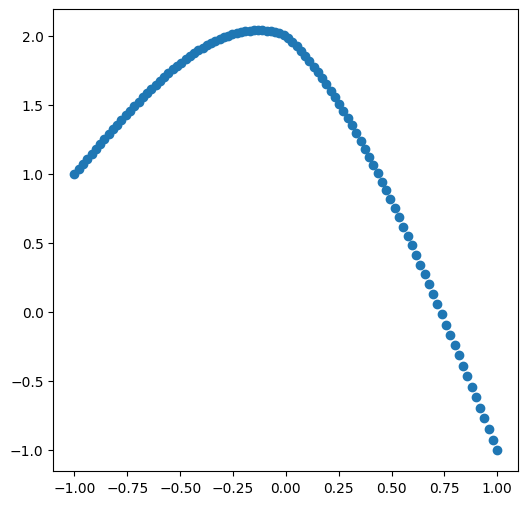

In [ ]:
t_test = np.array((-1, 0, 1))
y_test = np.array((1, 2, -1))
x_test = np.linspace(-1, 1, 100)

sp_test = np.array([Spline3_Eval(2, t_test, y_test, x__, Spline3_Coef(2, t_test, y_test)) for x__ in x_test])

plt.figure(figsize=(6, 6))
plt.scatter(x_test, sp_test)
plt.show()

## 공간 곡선

2차원에서 휘어지고 꼬이는 복잡한 곡선의 매개변수 표현을 2개의 3차 스플라인 함수를 이용해 만들 수 있다.

곡선위의 점들을 선택 후, 각 $x, y$에 대해 3차 스플라인 함수를 적용하면 된다.

다음의 예제는 뱀 모양의 곡선 serpentine curve 이다.

$$y = \frac{x}{1/4 + x^{2}}$$

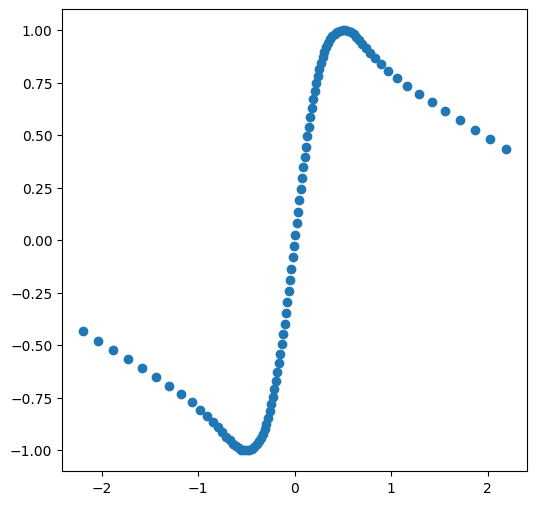

In [ ]:
theta_test = np.linspace(-6, 6, 13)
theta_test *= (np.pi/14) # 6/14 < 1/2 -> tan < infty

curve_testx = np.tan(theta_test)/2
curve_testy = np.sin(2*theta_test)

thetas = np.linspace(-6, 6, 100)
thetas *= (np.pi/14)

curve_x = np.array([Spline3_Eval(12, theta_test, curve_testx, t__, Spline3_Coef(12, theta_test, curve_testx)) for t__ in thetas])
curve_y = np.array([Spline3_Eval(12, theta_test, curve_testy, t__, Spline3_Coef(12, theta_test, curve_testy)) for t__ in thetas])

plt.figure(figsize=(6, 6))
plt.scatter(curve_x, curve_y)
plt.show()

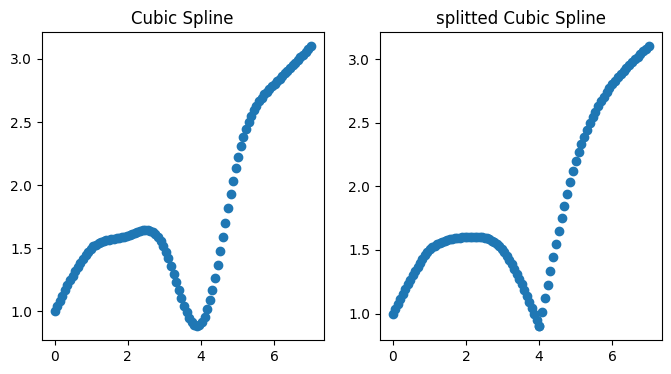

In [ ]:
t_test = np.arange(0, 8)
y_test = np.array((1.0, 1.5, 1.6, 1.5, 0.9, 2.2, 2.8, 3.1))
x_test = np.linspace(0, 7, 100)

sp_test = np.array([Spline3_Eval(7, t_test, y_test, x__, Spline3_Coef(7, t_test, y_test)) for x__ in x_test])

x_t1 = np.linspace(0, 4, 60)
x_t2 = np.linspace(4, 7, 40)
split_sp1 = np.array([Spline3_Eval(4, t_test[:5], y_test[:5], x__, Spline3_Coef(4, t_test[:5], y_test[:5])) for x__ in x_t1])
split_sp2 = np.array([Spline3_Eval(3, t_test[4:], y_test[4:], x__, Spline3_Coef(3, t_test[4:], y_test[4:])) for x__ in x_t2])

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.scatter(x_test, sp_test)
plt.title('Cubic Spline')

plt.subplot(1,2,2)
plt.scatter(list(x_t1) + list(x_t2), list(split_sp1)+list(split_sp2))
plt.title('splitted Cubic Spline')
plt.show()

## 매끄러움의 성질



함수에서의 거친 진동은 함수의 미분값이 크기 때문에 나타난다.

In [ ]:
#3
#학교 로고 만들기
KHU_knots1 = [[340, 355], [317, 338], [313, 300], [331, 280], [316, 250], [266, 280], [300, 340], [317, 338]]
KHU_knots2 = [[340, 345], [327, 328], [326, 302], [340, 286]]

KHU_knots1 = np.array(KHU_knots1) - np.array([340, 355])
KHU_knots3 = -KHU_knots1

KHU_knots2 = np.array(KHU_knots2) - np.array([340, 355])
KHU_knots2 = np.concatenate((KHU_knots2, -KHU_knots2[::-1][1:4]))
KHU_knots2[-3:,1] *= -1
KHU_knots2

array([[  0, -10],
       [-13, -27],
       [-14, -53],
       [  0, -69],
       [ 14, -53],
       [ 13, -27],
       [  0, -10]])

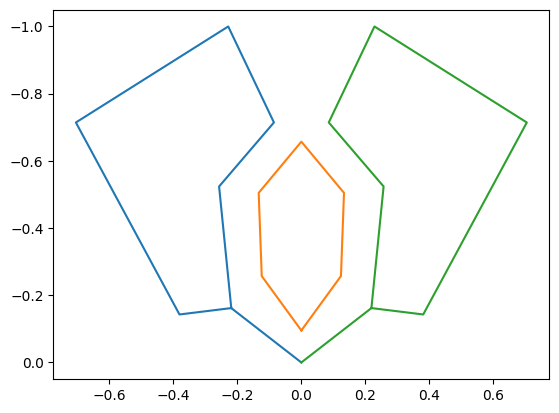

In [ ]:
KHU_knots1 = KHU_knots1/105
KHU_knots2 = KHU_knots2/105
KHU_knots3 = KHU_knots3/105

KHU_knots3[:, 1] *= -1

plt.gca().invert_yaxis()
plt.plot(KHU_knots1[:, 0], KHU_knots1[:, 1])
plt.plot(KHU_knots2[:, 0], KHU_knots2[:, 1])
plt.plot(KHU_knots3[:, 0], KHU_knots3[:, 1])
plt.show()

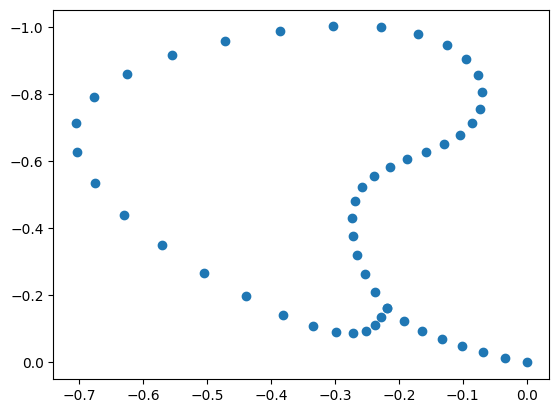

In [ ]:
leftt1 = np.linspace(0, len(KHU_knots1)-1, 50)

KHU_leftx = np.array([Spline3_Eval(len(KHU_knots1)-1, np.arange(len(KHU_knots1)), KHU_knots1[:, 0], x__, Spline3_Coef(len(KHU_knots1)-1, np.arange(len(KHU_knots1)), KHU_knots1[:, 0])) for x__ in leftt1])
KHU_lefty = np.array([Spline3_Eval(len(KHU_knots1)-1, np.arange(len(KHU_knots1)), KHU_knots1[:, 1], x__, Spline3_Coef(len(KHU_knots1)-1, np.arange(len(KHU_knots1)), KHU_knots1[:, 1])) for x__ in leftt1])

plt.gca().invert_yaxis()
plt.scatter(KHU_leftx, KHU_lefty)
plt.show()

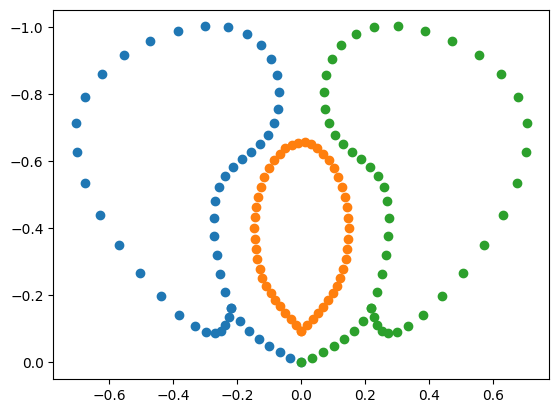

In [ ]:
centert1 = np.linspace(0, len(KHU_knots2)-1, 50)
rightt1 = np.linspace(0, len(KHU_knots3)-1, 50)

KHU_centerx = np.array([Spline3_Eval(len(KHU_knots2)-1, np.arange(len(KHU_knots2)), KHU_knots2[:, 0], x__, Spline3_Coef(len(KHU_knots2)-1, np.arange(len(KHU_knots2)), KHU_knots2[:, 0])) for x__ in centert1])
KHU_centery = np.array([Spline3_Eval(len(KHU_knots2)-1, np.arange(len(KHU_knots2)), KHU_knots2[:, 1], x__, Spline3_Coef(len(KHU_knots2)-1, np.arange(len(KHU_knots2)), KHU_knots2[:, 1])) for x__ in centert1])

KHU_rightx = np.array([Spline3_Eval(len(KHU_knots3)-1, np.arange(len(KHU_knots3)), KHU_knots3[:, 0], x__, Spline3_Coef(len(KHU_knots3)-1, np.arange(len(KHU_knots3)), KHU_knots3[:, 0])) for x__ in rightt1])
KHU_righty = np.array([Spline3_Eval(len(KHU_knots3)-1, np.arange(len(KHU_knots3)), KHU_knots3[:, 1], x__, Spline3_Coef(len(KHU_knots3)-1, np.arange(len(KHU_knots3)), KHU_knots3[:, 1])) for x__ in rightt1])



plt.gca().invert_yaxis()
plt.scatter(KHU_leftx, KHU_lefty)
plt.scatter(KHU_centerx, KHU_centery)
plt.scatter(KHU_rightx, KHU_righty)
plt.show()

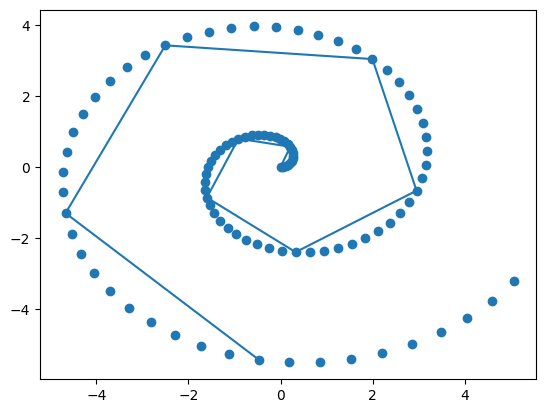

In [ ]:
#5

xs = np.linspace(0, 12, 100)

ty = xs * np.sin(xs) / 2
tx = xs * np.cos(xs) / 2

helixidx = np.arange(0, 100, 10)


plt.scatter(tx, ty)
plt.plot(tx[helixidx],ty[helixidx])
plt.show()

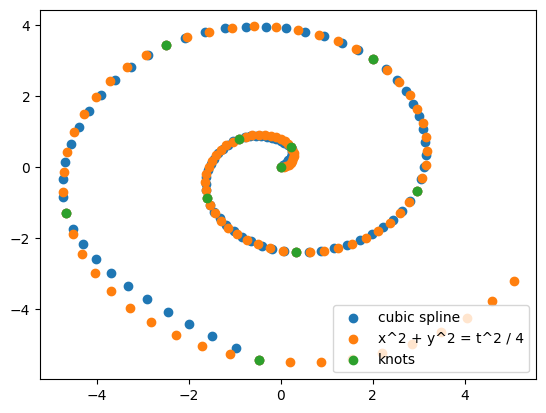

In [ ]:
xs = np.linspace(0, 9, 100)

helixx = np.array([Spline3_Eval(9, np.arange(10), tx[helixidx], x__, Spline3_Coef(9, np.arange(10), tx[helixidx])) for x__ in xs])
helixy = np.array([Spline3_Eval(9, np.arange(10), ty[helixidx], x__, Spline3_Coef(9, np.arange(10), ty[helixidx])) for x__ in xs])

plt.scatter(helixx, helixy, label='cubic spline')
plt.scatter(tx, ty, label='x^2 + y^2 = t^2 / 4')
plt.scatter(tx[helixidx],ty[helixidx], label='knots')
plt.legend()
plt.show()

- 7번 문제

절점들이 등간격을 이루고 있을 때 더욱 효율적인 알고리즘으로 수정할 수 있다.

$h_{i} -> h$ 가 되면서 다음의 식들이 수정된다.

\begin{eqnarray}
S_{i}(x) &= &\frac{z_{i+1}}{6h_{i}}(x-t_{i})^{3} + \frac{z_{i}}{6h_{i}}(t_{i+1} - x)^{3} + (\frac{y_{i+1}}{h_{i}} - \frac{h_{i}}{6}z_{i+1})(x - t_{i}) + (\frac{y_{i}}{h_{i}} - \frac{h_{i}}{6}z_{i})(t_{i+1} - x)\\
&= &q_{i+1}(\frac{x-t_{i}}{h})^{3} + q_{i}(\frac{t_{i+1} - x}{h})^{3} + (y_{i+1} - q_{i+1})(\frac{x - t_{i}}{h}) + (y_{i} - q_{i})(\frac{t_{i+1} - x}{h})
\end{eqnarray}

이 때,

$$q_{i} = \frac{h^{2}z_{i}}{6}$$

그리고 3중 대각 연립방정식이 다음과 같이 바뀐다.
\begin{eqnarray}
u_{i} &= &4h \\
v_{i}& = &6(b_{i} - b_{i-1}) = 6(\frac{y_{i+1} - y_{i-1}}{h})
\end{eqnarray}



\begin{eqnarray}
\begin{cases}
z_0 &= &0\\
hz_{i-1} + 2hz_{i} +hz_{i+1}&= &6(\frac{y_{i+1} - 2y_{i} + y_{i-1}}{h})  \:\:\:\:\: (1 \leq i \leq n-1)\\
z_{n} &= &0
\end{cases}
\end{eqnarray}

$$↓$$

\begin{eqnarray}
\begin{cases}
q_0 &= &0\\
q_{i-1} + 4q_{i} +q_{i+1}&= &(y_{i+1} - 2y_{i} +y_{i-1})  \:\:\:\:\: (1 \leq i \leq n-1)\\
q_{n} &= &0
\end{cases}
\end{eqnarray}

다음으로 $q_{i}$를 역 귀납법을 통해 구할 수 있다.
\begin{eqnarray}
\begin{cases}
q_{n} = 0, q_{n-1} = \beta_{n-1} \\
q_{i} = \alpha_{i}q_{i+1} + \beta{i}&(i=n-2, n-3, \cdots, 0)\\
\end{cases}
\end{eqnarray}


\begin{eqnarray}
\begin{cases}
\alpha_{0} = 0, a_{i} = -(\alpha_{i-1} + 4)^{-1} &(1\leq i \leq n)\\
\beta_{0} = 0, \beta_{i} = -\alpha_{i}(y_{i+1} - 2y_{i} + y_{i-1} - \beta_{i-1}) &(1\leq i \leq n)\\
\end{cases}
\end{eqnarray}

이를 통해 알고리즘을 수정하여 새로운 함수를 만들 수 있다.

In [ ]:
def Spline3_uniform_Coef(n, t_, y_):
  q_list = []
  a_list = []
  b_list = []

  a_list.append(0)
  b_list.append(0)

  for i in range(n-1):
    a_list.append(-1/(a_list[i] + 4))
    b_list.append(-a_list[i+1]*(y_[i+2]  - 2*y_[i+1] + y_[i] - b_list[i]))

  q_list = np.zeros(n+1)
  q_list[n-1] = b_list[n-1]

  for i in range(n-2, -1, -1):
    q_list[i] = (a_list[i]*q_list[i+1] + b_list[i])

  return q_list

def Spline3_uniform_Eval(n, t_, y_, x, coefs):
  intv = 0
  for j in range(n):
    if (t_[j+1] - x) >= 0:
      intv = j

      break
  h = t_[1] - t_[0]
  tmp = (3*coefs[intv]/h**2) + (x - t_[intv])*(coefs[intv+1] - coefs[intv])/(h)
  tmp = (-2*coefs[intv] - coefs[intv+1] - y_[intv] + y_[intv+1]) / h + (x - t_[intv])*tmp
  result = y_[intv] + (x - t_[intv])*tmp

  return result

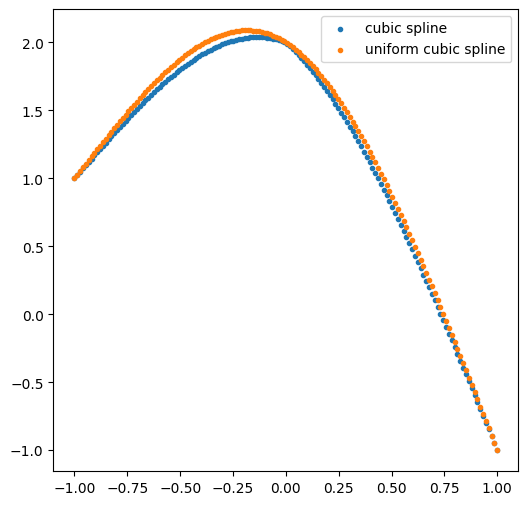

In [ ]:
t_test = np.array((-1, 0, 1))
y_test = np.array((1, 2, -1))
x_test = np.linspace(-1, 1, 150)

sp_test = np.array([Spline3_Eval(2, t_test, y_test, x__, Spline3_Coef(2, t_test, y_test)) for x__ in x_test])
sp_uni = np.array([Spline3_uniform_Eval(2, t_test, y_test, x__, Spline3_uniform_Coef(2, t_test, y_test)) for x__ in x_test])

plt.figure(figsize=(6, 6))
plt.scatter(x_test, sp_test, marker='.', label = 'cubic spline')
plt.scatter(x_test, sp_uni, marker='.', label = 'uniform cubic spline')
plt.legend()
plt.show()

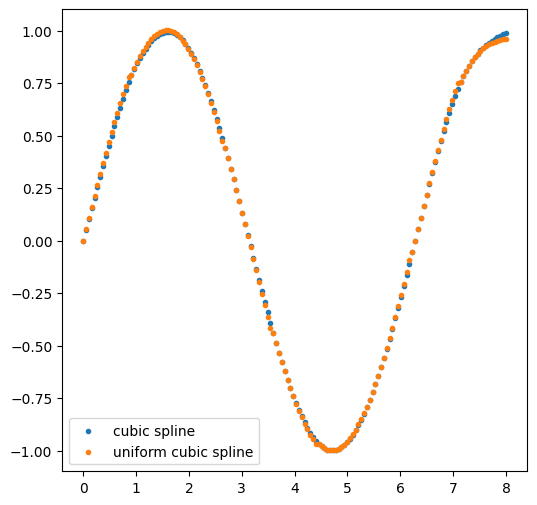

In [ ]:
t_test = np.linspace(0, 8, 10)
y_test = np.sin(t_test)
x_test = np.linspace(0, 8, 150)

sp_test = np.array([Spline3_Eval(9, t_test, y_test, x__, Spline3_Coef(9, t_test, y_test)) for x__ in x_test])
sp_uni = np.array([Spline3_uniform_Eval(9, t_test, y_test, x__, Spline3_uniform_Coef(9, t_test, y_test)) for x__ in x_test])

plt.figure(figsize=(6, 6))
plt.scatter(x_test, sp_test, marker='.', label = 'cubic spline')
plt.scatter(x_test, sp_uni, marker='.', label = 'uniform cubic spline')
plt.legend()
plt.show()

- 9번 문제

$[a, b]$의 임의의 $x$에 대해 $f'(x)$를 추정하는 프로시저 작성

주어진 구간 내의 절점들에 대한 $f$의 함숫값을 알고 있을때,3차 스플라인 함수를 통해 얻은 함숫값들로 $f'(x)$를 근사식으로 표현한다.


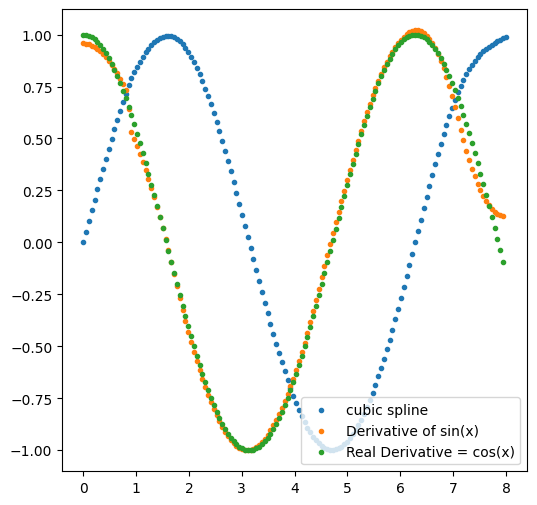

In [5]:
#9
delta = 0.05

t_test = np.linspace(0, 8, 10)
y_test = np.sin(t_test)
x_test = np.linspace(0, 8, 150)

sp_test = np.array([Spline3_Eval(9, t_test, y_test, x__, Spline3_Coef(9, t_test, y_test)) for x__ in x_test])

sp_Deriv = (sp_test[1:] - sp_test[:-1]) / x_test[1]
real_cos = np.cos(x_test)[:-1]

plt.figure(figsize=(6, 6))
plt.scatter(x_test, sp_test, marker='.', label = 'cubic spline')
plt.scatter(x_test[:-1], sp_Deriv, marker='.', label = 'Derivative of sin(x)')
plt.scatter(x_test[:-1], real_cos, marker='.', label = 'Real Derivative = cos(x)')

plt.legend(loc = 'lower right')
plt.show()

# 6.3 B 스플라인 : 보간과 근사

이 장에서는 B 스플라인(B spline) 이론을 소개한다. B 스플라인은 수치 작업에 잘 활용되며 데이터를 근사하는 실제 프로그램에서 자주 사용하는 특수한 스플라인 함수이다. B 스플라인이라는 이름은 이 함수들이 모든 스플라인 집합의 기저 Basis 가 됨을 의미한다.

이 절 전체에 걸쳐 절점의 무한 집합 $\{t_{i}\}$는 다음과 같이 정의한다.

\begin{eqnarray}
\begin{cases}
\cdots < t_{-2} < t_{=1} < t_{0} < t_{1} < t_{2} < \cdots \\
\lim_{t \to ∞} t_{i}  = \infty = - lim_{i\to\infty}t_{-i}
\end{cases}
\end{eqnarray}


---

## $B_{i}^{0}$ 스플라인

***0차 스플라인***은 다음과 같이 정의한다.

\begin{eqnarray}
B_{i}^{0}(x) =
\begin{cases}
1 \:, t_{i} \leq x < t_{i+1} \\
0 \:, 그 \:외
\end{cases}
\end{eqnarray}

명백하게 이 함수는 불연속이다. 하지만 모든 점, 심지어 도약 jump이 발생한 점조차 그 오른쪽 부터는 연속이다. 따라서 다음을 얻는다.

$$\lim_{x\to t_{i}^{+}}{B_{i}^{0}(x)} = 1 = B_{i}^{0}(t_{i}), \lim_{x\to t_{i+1}^{+}}{B_{i}^{0}(x)} = 0 = B_{i}^{0}(t_{i+1})$$

만약 함수 $f$의 받침 support을 $f(x) \neq 0$인 점 $x$들의 집합이라 정의하면 이 함수의 받침은 반 열린 구간 $[ t_{i}, t_{i+1} )$이다. 이 함수는 구간별 상수 함수이므로 0차 스플라인이다.

또한 이 함수는 모든 $i, x$에 대하여 0 이상이며, 다음의 추가 특징을 가진다.

$$ \sum^{\infty}_{i = -\infty} {B_{i}^{0}(x)} = 1$$

이는 고정된 $x$가 속한 단일 구간 외에서는 함숫값이 0이므로 자명하며, $t_{m} \leq x < t_{m+1}$인 유일한 정수 $m$이 존재하고 다음을 만족한다.

$$\sum^{\infty}_{i = -\infty} {B_{i}^{0}(x)} = B_{m}^{0}(x) = 1$$

오른쪽으로부터 연속이고 주어진 무한 집합의 절점에 기반을 두고 있는 모든 0차 스플라인은 B 스플라인의 선형 결합으로 나타낼 수 있다.

$$ S(x) = b_{i}, \quad t_{i} \leq x < t_{i+1}, \quad i \in $\mathbb{Z} $$

$$ S = \sum^{\infty}_{i = -\infty} {b_{i}B_{i}^{0}} $$

